In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, \
                            auc, confusion_matrix, accuracy_score, \
                            classification_report

from sklearn.preprocessing import label_binarize

In [7]:
df_data_general = pd.read_csv('../../data/data_general.csv')

In [8]:
columns_selected = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le', 'Cluster']
df_data_selected = df_data_general[columns_selected]

# KNN

In [9]:
X = df_data_selected.drop('Cluster', axis=1)
y = df_data_selected['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
y_hat_knn = knn.predict(X_test)

In [11]:
accuracy_score(y_test, y_hat_knn)

0.9954210124650216

In [12]:
target_names = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']


print(classification_report(y_test, y_hat_knn, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       1.00      1.00      1.00     22627
   cluster 1       0.98      0.97      0.97      3667
   cluster 2       1.00      1.00      1.00     16489
   cluster 3       1.00      0.95      0.97       458

    accuracy                           1.00     43241
   macro avg       0.99      0.98      0.98     43241
weighted avg       1.00      1.00      1.00     43241



# RidgeClassifier

In [13]:
X = df_data_selected.drop('Cluster', axis=1)
y = df_data_selected['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
ridge_classifer = RidgeClassifier()

ridge_classifer.fit(X_train, y_train)

RidgeClassifier()

In [14]:
y_hat_ridge = ridge_classifer.predict(X_test)

In [15]:
accuracy_score(y_test, y_hat_ridge)

0.9221109595060244

In [16]:
target_names = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']

print(classification_report(y_test, y_hat_ridge, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       0.92      1.00      0.96     22566
   cluster 1       0.65      0.22      0.33      3711
   cluster 2       0.94      1.00      0.97     16510
   cluster 3       0.00      0.00      0.00       454

    accuracy                           0.92     43241
   macro avg       0.63      0.56      0.57     43241
weighted avg       0.90      0.92      0.90     43241



/Users/rodrigosantacruzespino/miniconda3/envs/Foliatti/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rodrigosantacruzespino/miniconda3/envs/Foliatti/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rodrigosantacruzespino/miniconda3/envs/Foliatti/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

# GaussianNB

In [17]:
X = df_data_selected.drop('Cluster', axis=1)
y = df_data_selected['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
gaussian_nb = GaussianNB()

gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [18]:
y_hat_gaussian = gaussian_nb.predict(X_test)

In [19]:
accuracy_score(y_test, y_hat_gaussian)

0.9561989778219745

In [20]:
target_names = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']


print(classification_report(y_test, y_hat_gaussian, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       1.00      0.95      0.97     22325
   cluster 1       0.72      0.97      0.83      3829
   cluster 2       0.98      0.96      0.97     16590
   cluster 3       0.86      1.00      0.92       497

    accuracy                           0.96     43241
   macro avg       0.89      0.97      0.92     43241
weighted avg       0.97      0.96      0.96     43241



# RandomForestClassifier

In [21]:
X = df_data_selected.drop('Cluster', axis=1)
y = df_data_selected['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_hat_random = random_forest.predict(X_test)

In [23]:
accuracy_score(y_test, y_hat_random)

0.9974407202984799

In [24]:
target_names = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']
print(classification_report(y_test, y_hat_random, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       1.00      1.00      1.00     33591
   cluster 1       0.99      0.98      0.99      5622
   cluster 2       1.00      1.00      1.00     24932
   cluster 3       0.99      0.99      0.99       717

    accuracy                           1.00     64862
   macro avg       0.99      0.99      0.99     64862
weighted avg       1.00      1.00      1.00     64862



In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
columns = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
components = pca.fit_transform(df_data_general[columns])
df_data_general['PCA1'] = components[:, 0]
df_data_general['PCA2'] = components[:, 1]


<Axes: xlabel='PCA1', ylabel='PCA2'>

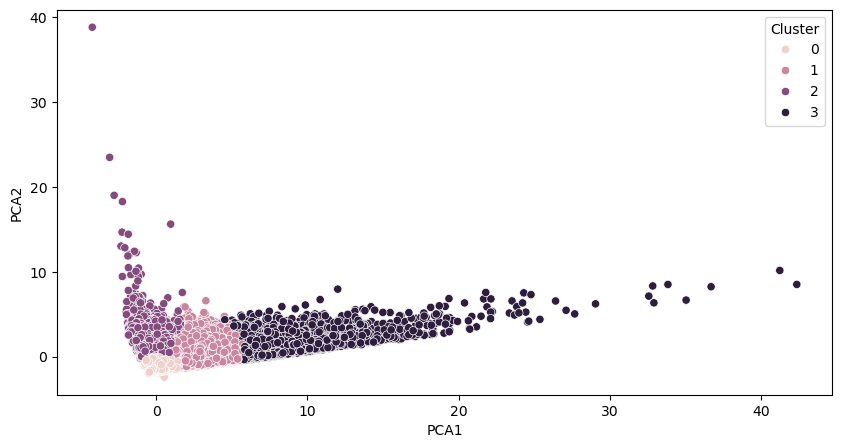

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_data_general, x='PCA1', y='PCA2', hue='Cluster')

In [27]:
df_data_general['Cluster'].unique()

array([2, 1, 0, 3])

<Axes: xlabel='PCA1', ylabel='PCA2'>

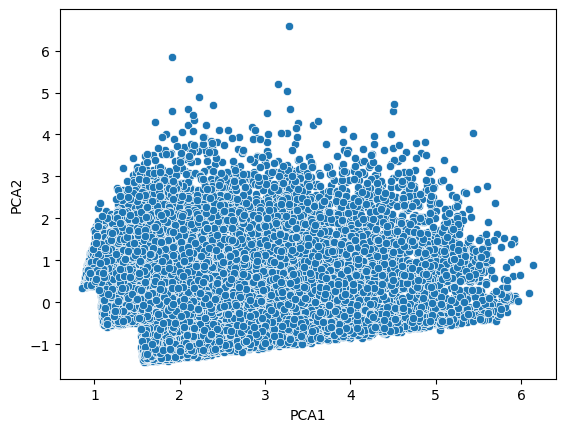

In [30]:

sns.scatterplot(df_cluster_1, x='PCA1', y='PCA2')

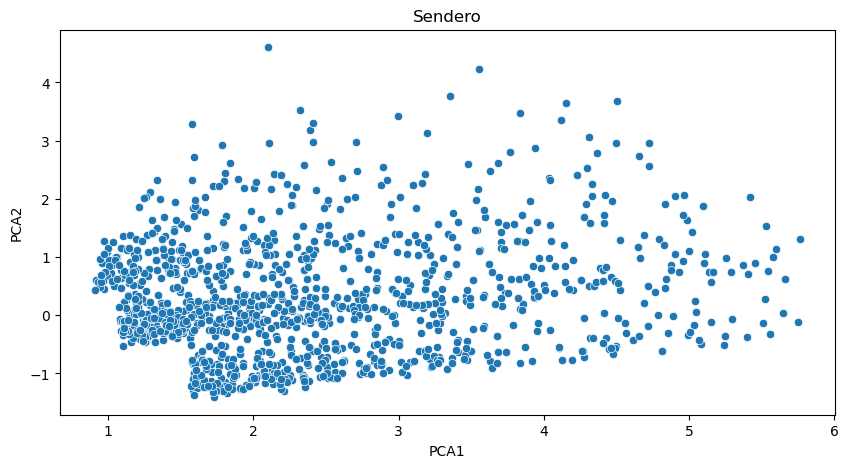

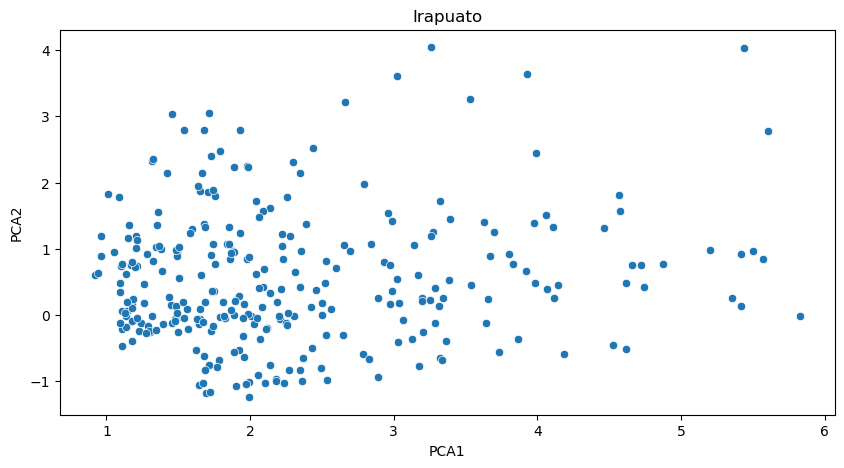

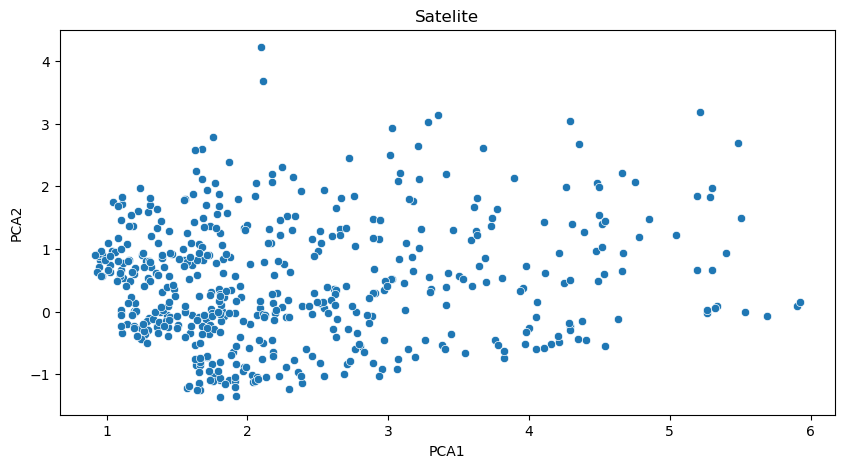

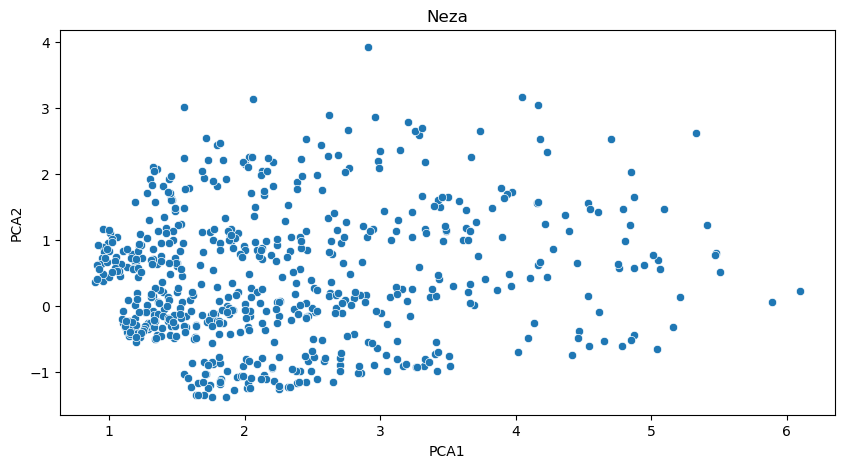

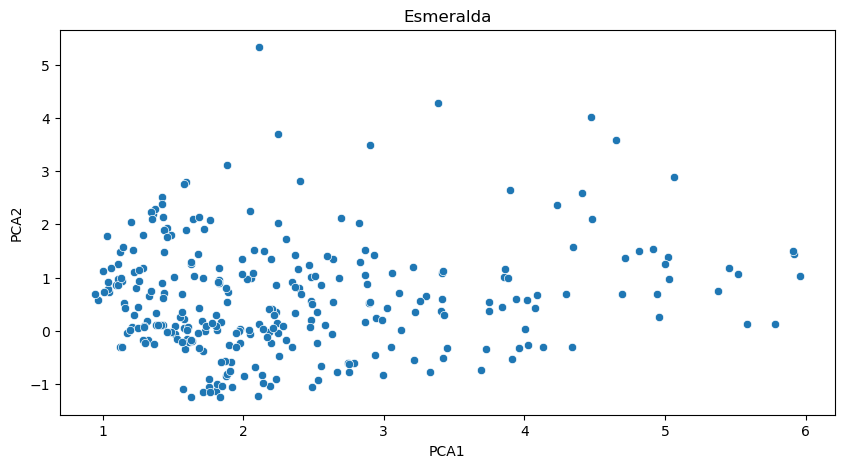

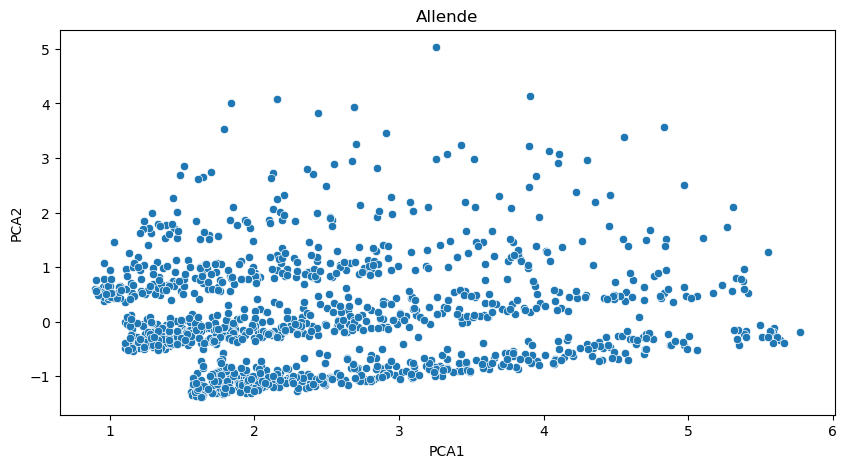

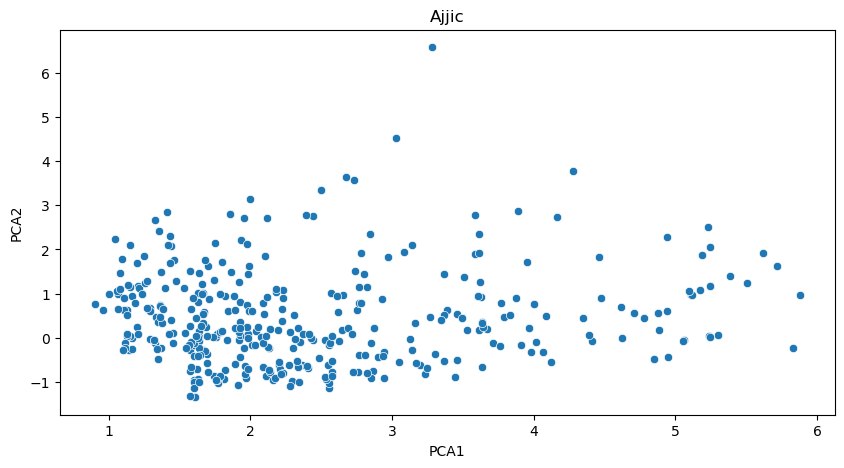

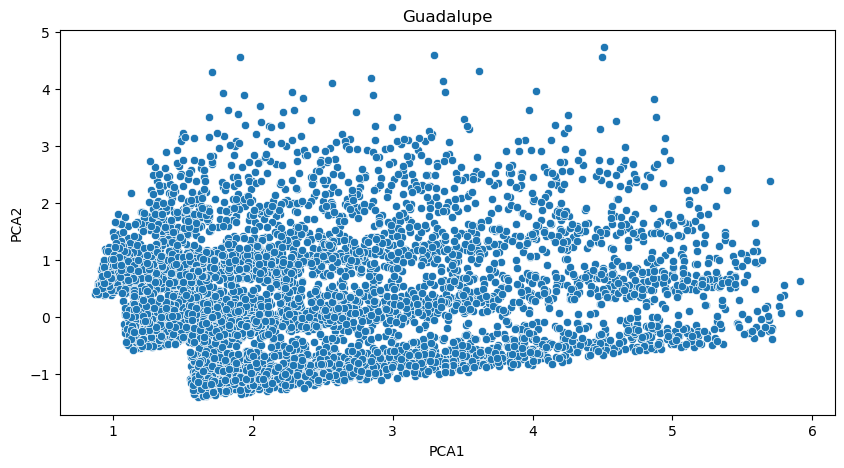

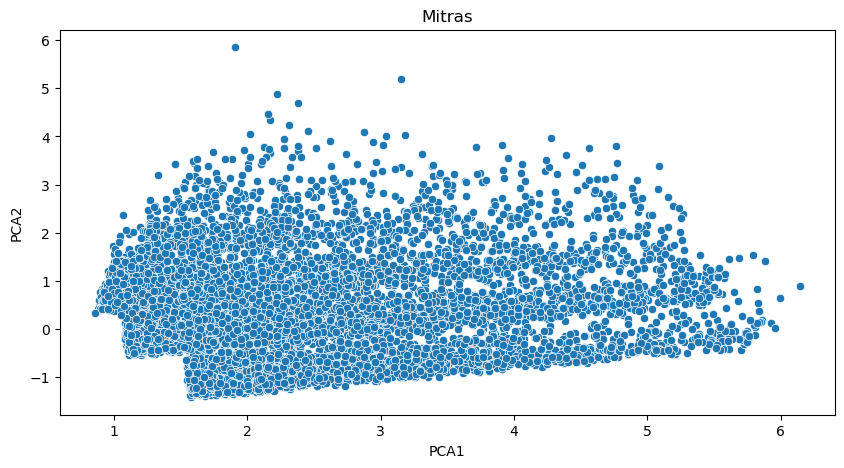

In [29]:
df_cluster_1 = df_data_general[df_data_general['Cluster'] == 1] 
casinos = df_cluster_1['Casino'].unique()

for casino in casinos:
    df_casino_cluster = df_cluster_1.loc[df_cluster_1['Casino'] == casino]
    plt.figure(figsize=(10,5))
    plt.title(casino)
    sns.scatterplot(df_casino_cluster, x='PCA1', y='PCA2')